In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from var_model.plot_utils import coeff_matrix_no_mask, coeff_matrix_mask, plot_coeff_heatmaps, plot_adj_matrix, plot_corr_mat,calculate_error_table,plot_ts, plot_multiple_adj_matrices
from var_model.utils import read_pickle
from var_model.model_train import order_cols
import pickle 
sns.set()
from collections import defaultdict

In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Load Models

In [4]:
def load_objects_model(dataset_name:str, normalization:str, order:int):
    if normalization !="":
        normalization = "_" + normalization
    mask = read_pickle(f"../data/05_model_output/{dataset_name}_mask{normalization}_order_{order}.pkl")
    var_list = read_pickle(f"../data/04_model_bn_output/{dataset_name}_var_list{normalization}_order_{order}.pkl")
    var_model_mask = read_pickle(f"../data/05_model_output/{dataset_name}_var_mask{normalization}_order_{order}.pkl")
    var_model_no_mask = read_pickle(f"../data/05_model_output/{dataset_name}_var_no_mask{normalization}_order_{order}.pkl")

    return mask, var_list, var_model_mask, var_model_no_mask

In [5]:
def load_objects_model_for_each_norm(dataset_name:str,order:int=1):
    normalizations = ["", "std", "minmax"]
    for normalization in normalizations:
        match normalization:
            case "":
                mask, var_list, var_model_mask, var_model_no_mask = load_objects_model(dataset_name, normalization, order)
            case "std":
                mask_std, var_list_std, var_model_mask_std, var_model_no_mask_std = load_objects_model(dataset_name, normalization, order)
            case "minmax":
                mask_minmax, var_list_minmax, var_model_mask_minmax, var_model_no_mask_minmax = load_objects_model(dataset_name, normalization, order)
    
    adj_mat_list = [mask, mask_std, mask_minmax]
    var_lists = [var_list, var_list_std, var_list_minmax]
    var_models_mask = [var_model_mask, var_model_mask_std, var_model_mask_minmax]
    var_models_no_mask = [var_model_no_mask, var_model_no_mask_std, var_model_no_mask_minmax]

    return adj_mat_list, var_lists, var_models_mask, var_models_no_mask

## Adjacency

In [6]:
def plot_adj_mats_for_model(dataset_name:str,  sup_title:str,order:int=1):
    
    adj_mat_list, var_lists, var_models_mask, var_models_no_mask = load_objects_model_for_each_norm(dataset_name, order)
    subplot_titles = ["no normalization", "standardization", "minmax scaling"]
    plot_multiple_adj_matrices(
    adj_mat_list= adj_mat_list,
    subplot_titles=subplot_titles,
    var_lists= var_lists,
    sup_title=sup_title,
)
    

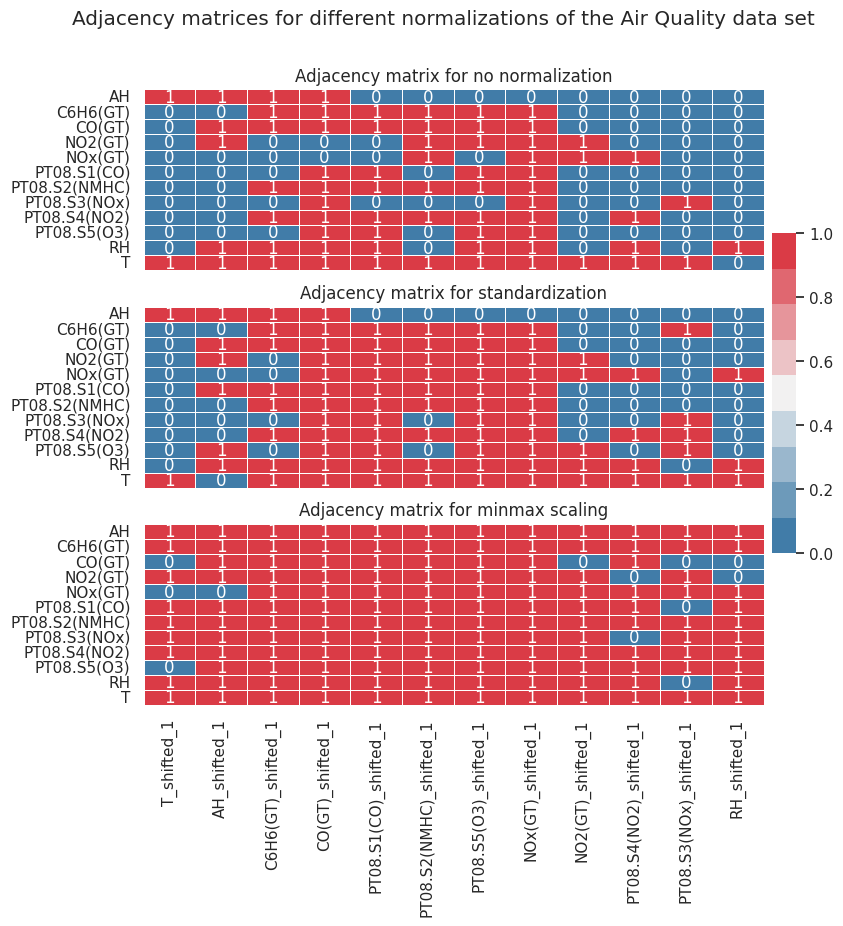

In [7]:
plot_adj_mats_for_model("air", "Air Quality", 1)

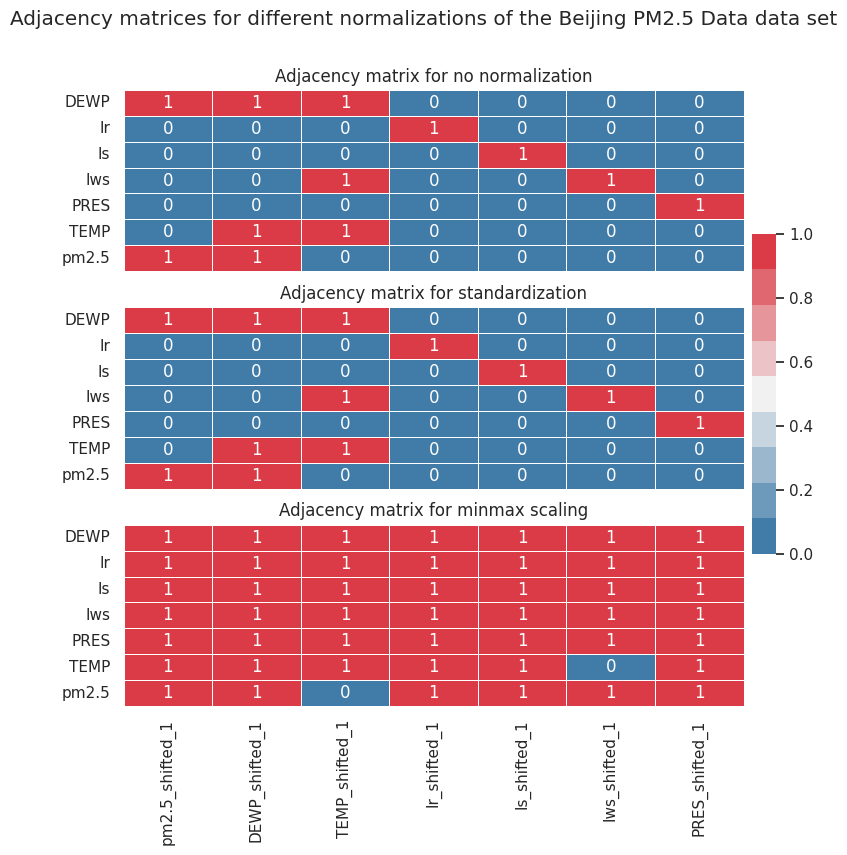

In [8]:
plot_adj_mats_for_model("PRSA", "Beijing PM2.5 Data", 1)

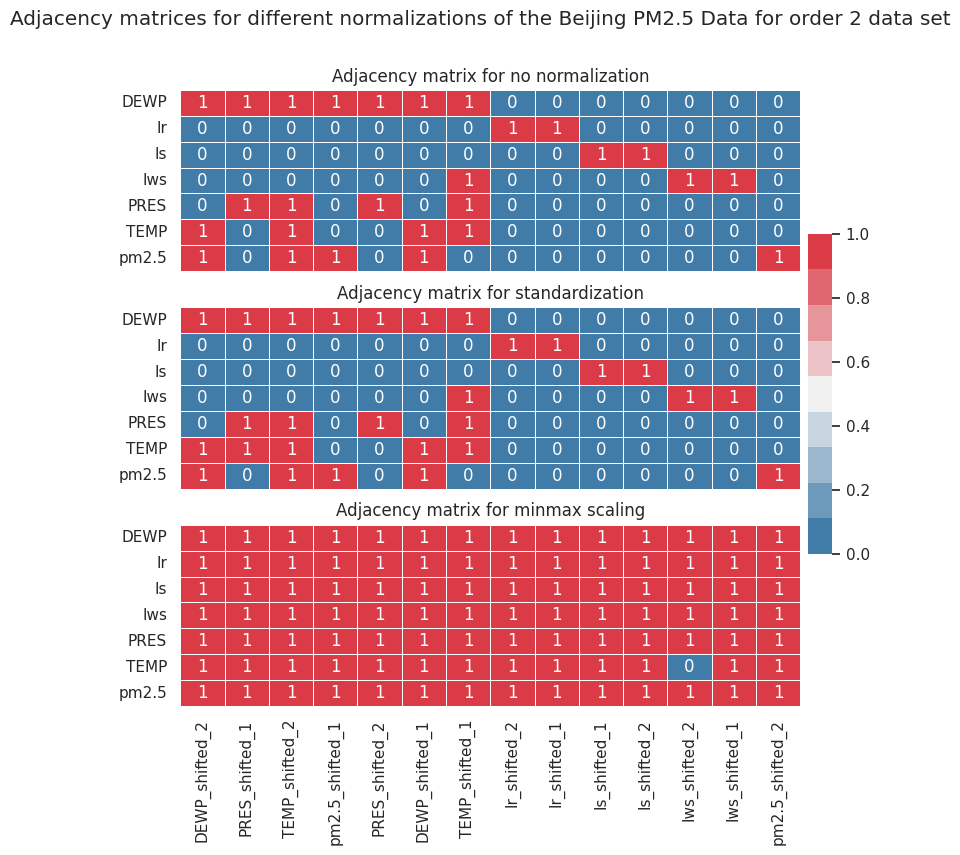

In [9]:
plot_adj_mats_for_model("PRSA", "Beijing PM2.5 Data for order 2", 2)

## Corr

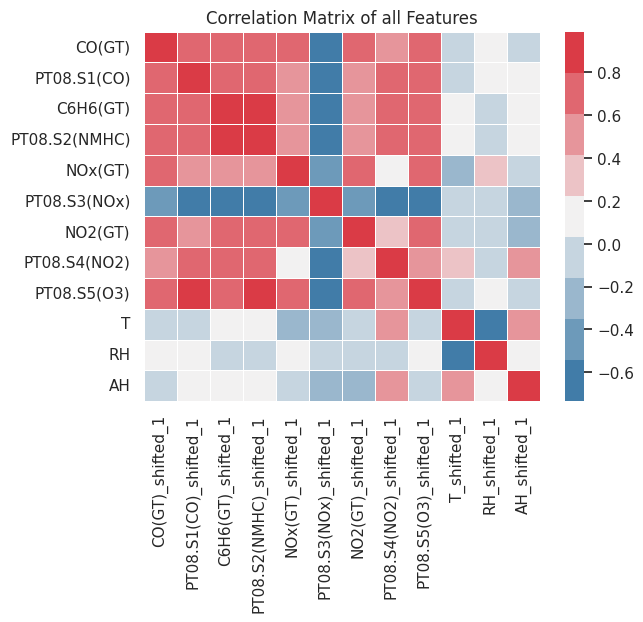

In [10]:
plot_corr_mat("air",1)

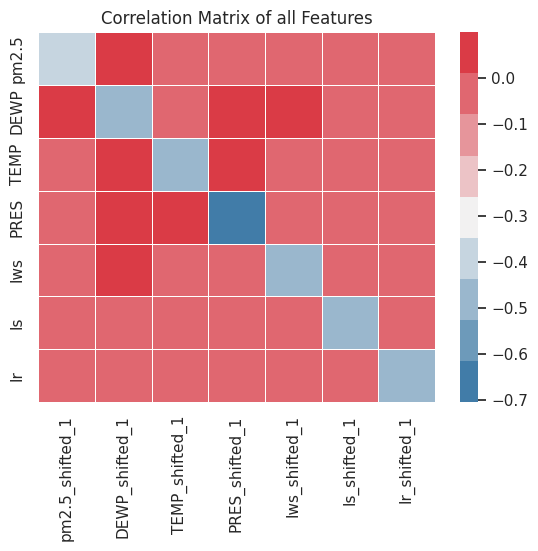

In [11]:
plot_corr_mat("prsa",1)

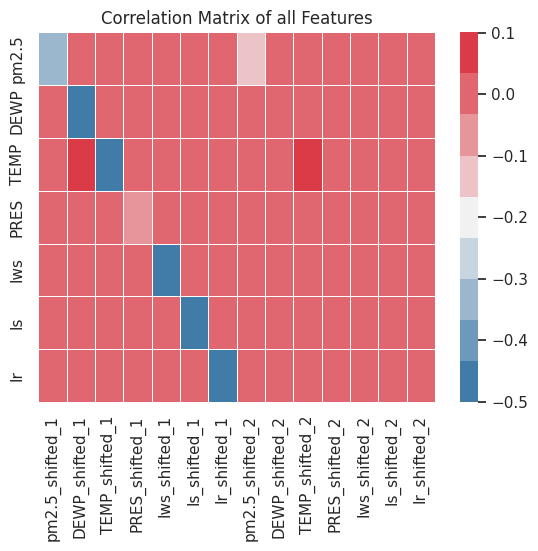

In [12]:
plot_corr_mat("prsa",2)

## Error Tables

In [13]:
df_error_air_rmse, df_error_air_mape = calculate_error_table("air", 1)

In [32]:
df_error_air_rmse

no normalization          standard scaler            \
                          mask  no mask            mask   no mask   
CO(GT)                  0.7564   0.7568          9.8936    9.7742   
PT08.S1(CO)            90.9458  89.8937        261.4158  274.5622   
C6H6(GT)                3.5642   3.5538       1041.2817 1030.6032   
PT08.S2(NMHC)         124.1163 122.3674        790.2414  792.5358   
NOx(GT)               107.2852 104.1679        104.3267  104.2513   
PT08.S3(NOx)           96.7999  95.8891        686.4473  699.4809   
NO2(GT)                26.5882  25.7909       1101.7686 1101.7153   
PT08.S4(NO2)          120.9838 118.3552        617.7579  634.8592   
PT08.S5(O3)           177.5410 175.5378       1075.7743 1075.9884   
T                       1.2346   1.2235         11.0390   11.0393   
RH                      4.6696   4.6702          4.8203    4.8181   
AH                      0.0316   0.0318          0.9394    0.9340   

              minmax scaler            
                       mask   no mask  
CO(GT)              10.1955   10.1675  
PT08.S1(CO)        163.9844  162.9461  
C6H6(GT)           826.0830  826.0830  
PT08.S2(NMHC)      801.0989  801.0989  
NOx(GT)            104.3258  104.2304  
PT08.S3(NOx)       317.6511  318.3727  
NO2(GT)           1139.9912 1141.6000  
PT08.S4(NO2)       378.7207  378.7207  
PT08.S5(O3)       1080.2144 1080.2202  
T                   11.0674   11.0674  
RH                   4.6885    4.6798  
AH                   2.2649    2.2649

In [38]:
print(df_error_air_rmse.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{no normalization} & \multicolumn{2}{l}{standard scaler} & \multicolumn{2}{l}{minmax scaler} \\
{} &             mask &  no mask &            mask &   no mask &          mask &   no mask \\
\midrule
CO(GT)        &           0.7564 &   0.7568 &          9.8936 &    9.7742 &       10.1955 &   10.1675 \\
PT08.S1(CO)   &          90.9458 &  89.8937 &        261.4158 &  274.5622 &      163.9844 &  162.9461 \\
C6H6(GT)      &           3.5642 &   3.5538 &       1041.2817 & 1030.6032 &      826.0830 &  826.0830 \\
PT08.S2(NMHC) &         124.1163 & 122.3674 &        790.2414 &  792.5358 &      801.0989 &  801.0989 \\
NOx(GT)       &         107.2852 & 104.1679 &        104.3267 &  104.2513 &      104.3258 &  104.2304 \\
PT08.S3(NOx)  &          96.7999 &  95.8891 &        686.4473 &  699.4809 &      317.6511 &  318.3727 \\
NO2(GT)       &          26.5882 &  25.7909 &       1101.7686 & 1101.7153 &     1139.9912 & 1141.6000 \\
PT08.S4(N

In [30]:
print(df_error_air_mape.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{no normalization} & \multicolumn{2}{l}{standard scaler} & \multicolumn{2}{l}{minmax scaler} \\
{} &             mask & no mask &            mask & no mask &          mask & no mask \\
\midrule
CO(GT)        &           0.2884 &  0.2830 &          0.8168 &  0.8124 &        0.8165 &  0.8173 \\
PT08.S1(CO)   &           0.0576 &  0.0563 &          0.3166 &  0.3422 &        0.1251 &  0.1237 \\
C6H6(GT)      &           0.3328 &  0.3455 &          0.9931 &  0.9931 &        0.9913 &  0.9913 \\
PT08.S2(NMHC) &           0.1053 &  0.1024 &          9.5038 &  9.9819 &       12.3597 & 12.3597 \\
NOx(GT)       &           0.2806 &  0.2512 &          0.2521 &  0.2519 &        0.2516 &  0.2514 \\
PT08.S3(NOx)  &           0.0930 &  0.0912 &          0.4713 &  0.4760 &        0.2891 &  0.2896 \\
NO2(GT)       &           0.1614 &  0.1500 &          0.8848 &  0.8848 &        0.8886 &  0.8888 \\
PT08.S4(NO2)  &           0.0781 &  0.0742 &     

In [16]:
df_error_prsa_rmse_1, df_error_prsa_mape_1 = calculate_error_table("prsa", 1)

In [37]:
print(df_error_prsa_rmse_1.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{no normalization} & \multicolumn{2}{l}{standard scaler} & \multicolumn{2}{l}{minmax scaler} \\
{} &             mask & no mask &            mask & no mask &          mask & no mask \\
\midrule
pm2.5 &          25.7732 & 25.7707 &         28.5886 & 28.5884 &       28.6106 & 28.6109 \\
DEWP  &           1.6962 &  1.6962 &         15.6414 & 15.6265 &       82.8107 & 82.8107 \\
TEMP  &           1.5480 &  1.5480 &          1.6642 &  1.6641 &        3.0414 &  3.0411 \\
PRES  &          13.2730 & 13.2730 &         20.1132 & 20.1197 &       18.6922 & 18.6922 \\
Iws   &          17.1613 & 17.1592 &         18.3638 & 18.3630 &       25.0070 & 25.0070 \\
Is    &           0.3221 &  0.3221 &          0.5597 &  0.5597 &        1.3220 &  1.3220 \\
Ir    &           0.6750 &  0.6749 &          0.7702 &  0.7699 &        1.2810 &  1.2810 \\
\bottomrule
\end{tabular}



In [18]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [36]:
print(df_error_prsa_mape_1.round(2).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{no normalization} & \multicolumn{2}{l}{standard scaler} & \multicolumn{2}{l}{minmax scaler} \\
{} &                mask & no mask &                mask & no mask &          mask & no mask \\
\midrule
pm2.5 &              0.8200 &  1.3400 &              1.3200 & 19.6800 &        0.5200 &  0.5400 \\
DEWP  &              0.4200 &  0.4100 &              2.9600 &  3.2800 &        1.1200 &  1.1200 \\
TEMP  &  5651978996130.1201 &  2.2200 &  5651978996130.2695 &  6.3000 &        0.6800 &  0.7000 \\
PRES  &              0.2300 &  0.2300 &              0.0800 &  0.0800 &        0.4400 &  0.4400 \\
Iws   &             14.7900 &  4.7000 &              3.3800 &  3.3900 &        1.7300 &  1.7300 \\
Is    &  4110530179003.3101 &  3.3800 &  4110530179003.3101 &  1.6800 &        1.0000 &  1.0000 \\
Ir    & 39563852972907.5625 & 10.9400 & 39563852972906.8594 &  5.8100 &        0.9800 &  0.9800 \\
\bottomrule
\end{tabular}



In [20]:
df_error_prsa_rmse_2, df_error_prsa_mape_2 = calculate_error_table("prsa", 2)

In [39]:
print(df_error_prsa_rmse_2.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{no normalization} & \multicolumn{2}{l}{standard scaler} & \multicolumn{2}{l}{minmax scaler} \\
{} &             mask & no mask &            mask & no mask &          mask & no mask \\
\midrule
pm2.5 &          24.8041 & 24.8073 &         28.5388 & 28.5386 &       28.5142 & 28.5142 \\
DEWP  &           1.6061 &  1.6059 &         17.4947 & 17.5064 &       84.1700 & 84.1700 \\
TEMP  &           1.5023 &  1.5045 &          1.6440 &  1.6442 &        3.0235 &  3.0236 \\
PRES  &          15.1407 & 15.1411 &         14.8057 & 14.8069 &       17.9294 & 17.9294 \\
Iws   &          16.2182 & 16.2161 &         17.8749 & 17.8735 &       22.6983 & 22.6983 \\
Is    &           0.3029 &  0.3030 &          0.6065 &  0.6068 &        1.3109 &  1.3109 \\
Ir    &           0.6357 &  0.6355 &          0.7677 &  0.7676 &        1.2413 &  1.2413 \\
\bottomrule
\end{tabular}



In [34]:
df_error_prsa_mape_2

no normalization             standard scaler         minmax scaler  \
                     mask no mask                mask no mask          mask   
pm2.5              0.5738  0.5331              3.3061  1.0379        0.5234   
DEWP               0.9451  0.3896              2.2505  3.3708        1.2691   
TEMP   2569081361877.6025  0.4811           7421.0538  0.8520        0.8897   
PRES               5.2478  3.7116              1.7735  1.2533        0.1484   
Iws                3.7382  2.4423              2.6537  3.4305        1.3265   
Is     3596713906627.8965  1.4893  3596713906627.9014  1.1427        0.9965   
Ir    37508587883405.6719  8.9450 37508587883405.2578  4.8732        0.9849   

               
      no mask  
pm2.5  0.5234  
DEWP   1.2691  
TEMP   0.9274  
PRES   0.1484  
Iws    1.3265  
Is     0.9965  
Ir     0.9849

In [35]:
print(df_error_prsa_mape_2.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{no normalization} & \multicolumn{2}{l}{standard scaler} & \multicolumn{2}{l}{minmax scaler} \\
{} &                mask & no mask &                mask & no mask &          mask & no mask \\
\midrule
pm2.5 &              0.5738 &  0.5331 &              3.3061 &  1.0379 &        0.5234 &  0.5234 \\
DEWP  &              0.9451 &  0.3896 &              2.2505 &  3.3708 &        1.2691 &  1.2691 \\
TEMP  &  2569081361877.6025 &  0.4811 &           7421.0538 &  0.8520 &        0.8897 &  0.9274 \\
PRES  &              5.2478 &  3.7116 &              1.7735 &  1.2533 &        0.1484 &  0.1484 \\
Iws   &              3.7382 &  2.4423 &              2.6537 &  3.4305 &        1.3265 &  1.3265 \\
Is    &  3596713906627.8965 &  1.4893 &  3596713906627.9014 &  1.1427 &        0.9965 &  0.9965 \\
Ir    & 37508587883405.6719 &  8.9450 & 37508587883405.2578 &  4.8732 &        0.9849 &  0.9849 \\
\bottomrule
\end{tabular}



## Model Coefficients

In [24]:
normalizations = ["","_std","_minmax"]

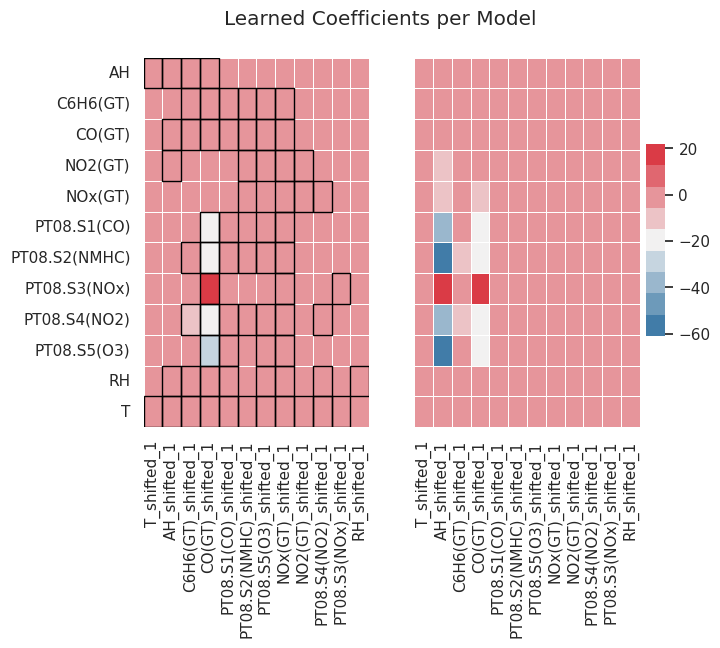

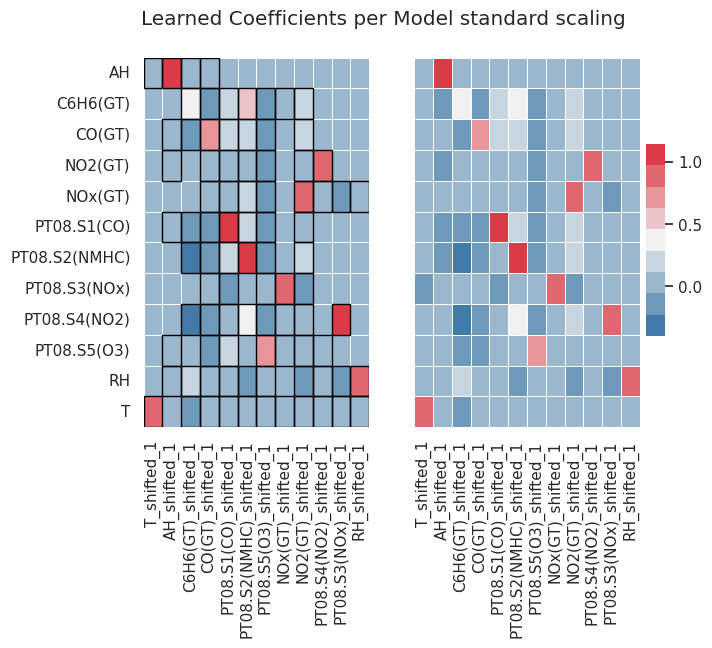

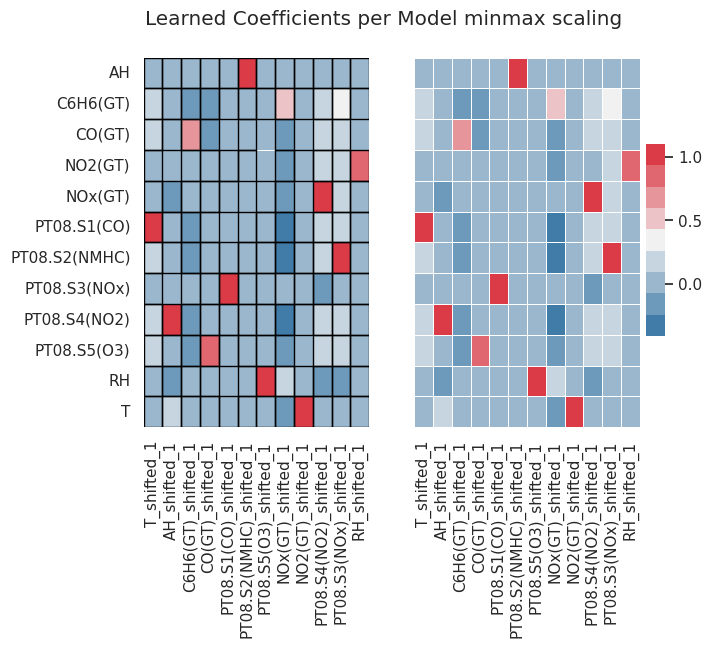

In [25]:
for normalization in normalizations:
    plot_coeff_heatmaps("air",1, normalization)

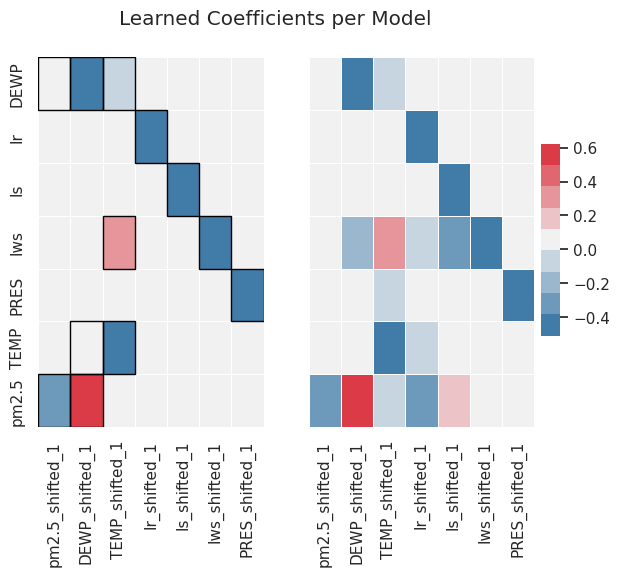

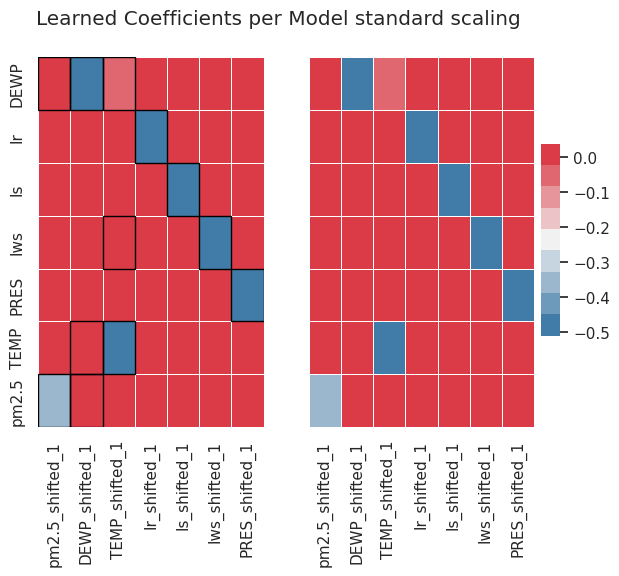

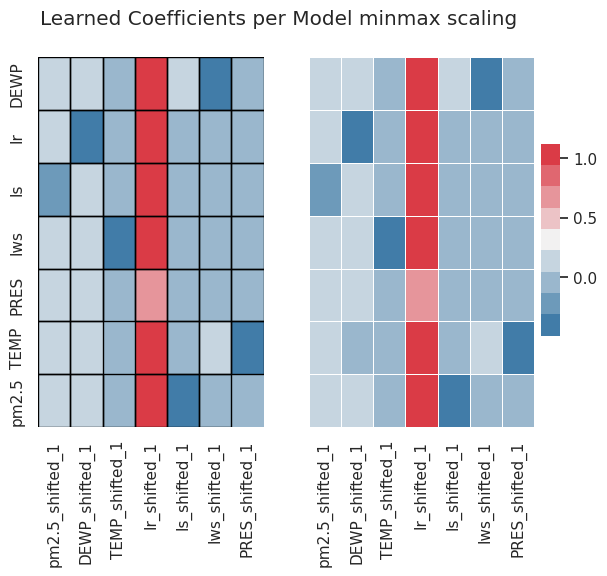

In [26]:
for normalization in normalizations:
    plot_coeff_heatmaps("prsa",1, normalization)

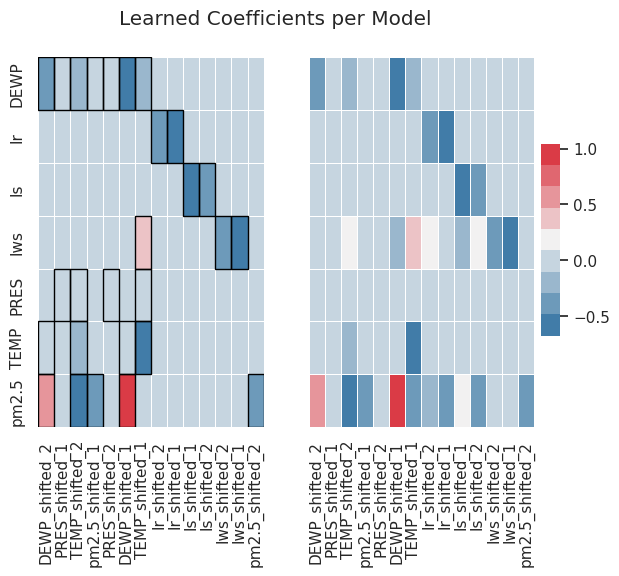

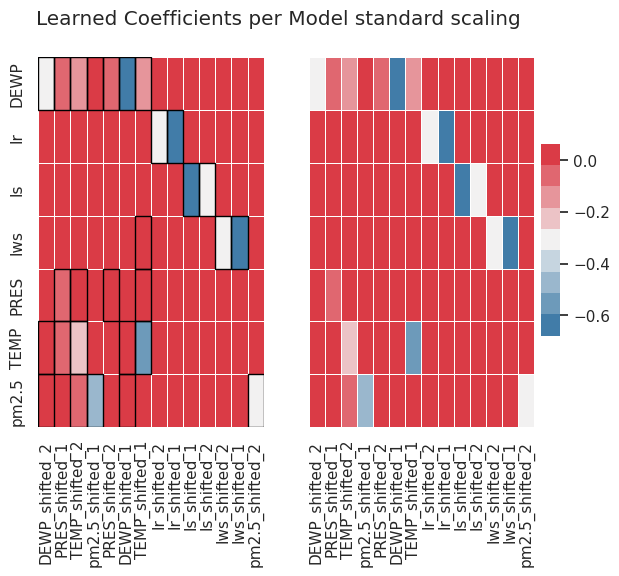

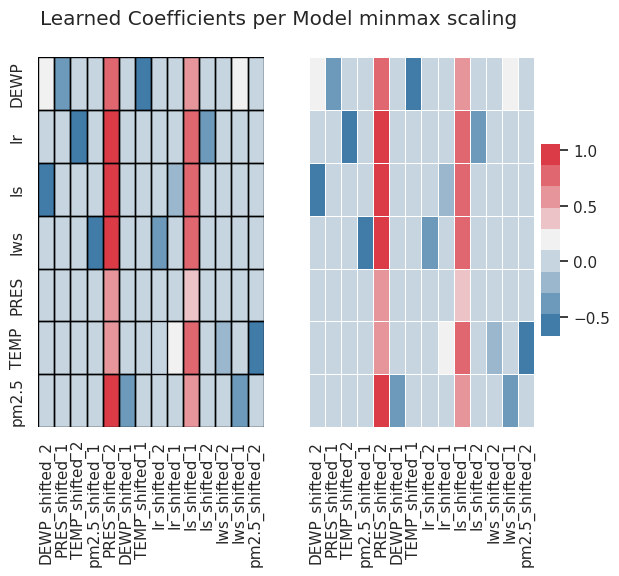

In [27]:
for normalization in normalizations:
    plot_coeff_heatmaps("prsa",2, normalization)

### join predictions

In [28]:
df_pred_air_mask = pd.read_csv("../data/05_model_output/air_pred_mask_order_1.csv")
df_pred_air_no_mask = pd.read_csv("../data/05_model_output/air_pred_no_mask_order_1.csv")
df_air_test = pd.read_csv("../data/03_model_input/air_test.csv")

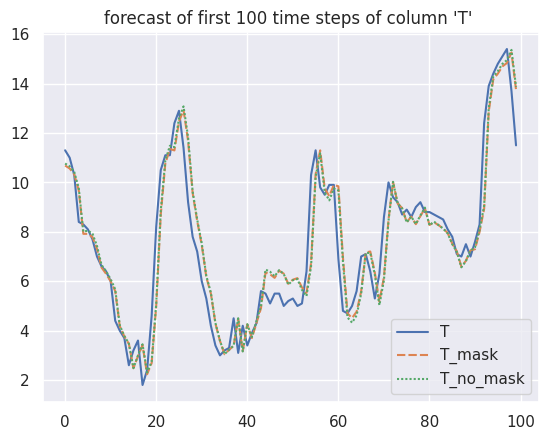

In [29]:
plot_ts(df_pred_air_mask,df_pred_air_no_mask, df_air_test, col = "T", time_steps= 100)